# Pima Indians Diabetes Tutorial
Feaured in Jason Brownlee's *Machine Learning Mastery* blog [here](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import tensorflow as tf
import numpy as np
import h5py
from keras.models import load_model
from sklearn import metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Load test set
X_test = np.loadtxt('X_test.csv', delimiter = ',')
y_test = np.loadtxt('y_test.csv', delimiter = ',')

In [3]:
# Load model
model = load_model('model_2.h5')

In [4]:
# Predict on new data
predictions = model.predict(X_test)
rounded = [round(x[0], 2) for x in predictions]
#print(rounded)

# Compare predicted vs. known results
#print(y_test.shape)
rounds = np.asarray(rounded)
comps = np.vstack((y_test,rounds))
#print(comps.shape)
#for i in range(comps.shape[1]):
    #print(comps[:,i])

In [6]:
# Build confusion matrix
threshold = float(input('Please input an evaluation threshold: '))
def create_confusion_matrix(results):
    tp = 0
    fp = 0
    tn = 0
    fn = 0

    for item in range(results.shape[1]):
        actual = results[0,item]
        predicted = results[1,item]
        if actual == 1 and predicted >= threshold:
            tp += 1
        elif actual == 0 and predicted >= threshold:
            fp += 1
        elif actual == 1 and predicted < threshold:
            fn += 1
        elif actual == 0 and predicted < threshold:
            tn += 1

    cm = np.array(([tp, fp], [fn, tn]))
    return cm

Please input an evaluation threshold: 0.25


In [7]:
# Compute model metrics
def model_metrics(mat):
    tp = float(mat[0,0])
    fp = float(mat[0,1])
    fn = float(mat[1,0])
    tn = float(mat[1,1])

    recall = round(tp/(tp+fn), 3)
    precision = round(tp / (tp + fp), 3)
    specificity = round(tn / (fp + tn), 3)
    accuracy = round((tp + tn) / (tp + fp +fn + tn), 3)

    print("Recall = {}".format(recall))
    print("Precision = {}".format(precision))
    print("Specificity = {}".format(specificity))
    print("Accuracy = {}".format(accuracy))

In [8]:
# Plot Receiever - Operator Characteristic Curve
def plot_roc_curve(target, scored):
    y = target
    scores = scored
    fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
    roc_auc = metrics.roc_auc_score(y, scores)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [9]:
# Plot Precision - Recall Curve
def plot_precision_recall_curve(trues, probs):
    y = trues
    scores = probs
    precision, recall, thresholds = metrics.precision_recall_curve(y, scores, pos_label = 1)
    average_precision = metrics.average_precision_score(y, scores)
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AUC = {0:0.2f}'.format(average_precision))
    plt.show()

Confusion Matrix
[[31 35]
 [ 9 41]]
Recall = 0.775
Precision = 0.47
Specificity = 0.539
Accuracy = 0.621


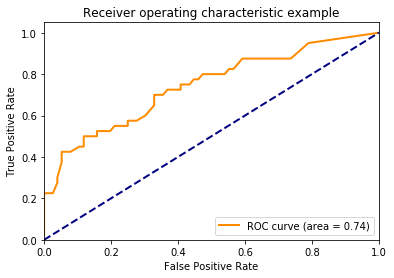

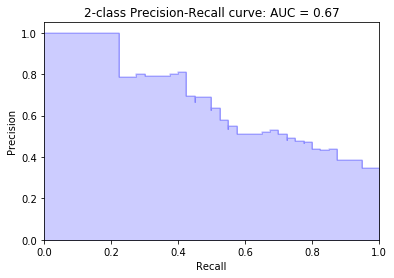

In [10]:
con_mat = create_confusion_matrix(comps)
print("Confusion Matrix")
print(con_mat)
model_metrics(con_mat)
plot_roc_curve(y_test, rounded)
plot_precision_recall_curve(y_test, rounded)